# Implementatation of gradient descent

In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the training data into feature matrix, class labels, and event ids:

In [18]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


### Now let us turn to the proper machine learning side of the problem

The run ridge regression function here computes everything we need in our problem. It works the follwing way.
- We define the parameters for our run, basically the degrees and the lambdas we want.
- The cross_validation function performs a k-fold cross-validation (takes a lot of time) and then returns the best degree of polynomial along with the associated lambda. 
- Then we just have to re-run the ridge regression once more with those parameters to get the optimal weights.
- The final step is to run the model on the testing data set, do our prediction and save the result

VERY IMPORTANT NOTE :
- The sanitation and standardization of the data are part of our modelling process, there should hence be included into the cross-validation process, as they differ for each sample that we consider.


 Testing for a stepsize  1.25892541179
max_iter= 5, Percentage of classification error :  0.434488
max_iter= 10, Percentage of classification error :  0.775096
max_iter= 15, Percentage of classification error :  0.430432

 Testing for a stepsize  2.11348903984
max_iter= 5, Percentage of classification error :  0.442304
max_iter= 10, Percentage of classification error :  0.782696
max_iter= 15, Percentage of classification error :  0.4395

 Testing for a stepsize  3.54813389234
max_iter= 5, Percentage of classification error :  0.446072
max_iter= 10, Percentage of classification error :  0.785868
max_iter= 15, Percentage of classification error :  0.444788

 Testing for a stepsize  5.95662143529
max_iter= 5, Percentage of classification error :  0.448244
max_iter= 10, Percentage of classification error :  0.788708
max_iter= 15, Percentage of classification error :  0.44754

 Testing for a stepsize  10.0
max_iter= 5, Percentage of classification error :  0.449524
max_iter= 10, Percentage

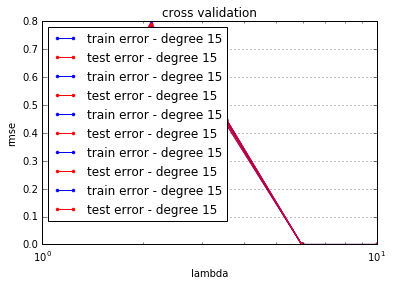

In [29]:
from gradient_descent import cross_validation, least_squares_GD
def run_gradient_descent(y, tX):
    """ridge regression running script. works on the RAW data"""
    
    # define parameters for our run   
    gammas = np.logspace(0.1,1,5)
    max_iters = np.array([5,10,15])
    k_fold = 4
    seed = 69
    
    rmse,gamma,error = cross_validation(y,tX,gammas,max_iters,k_fold,seed)
    #Let us now clean the input
    tX,median_tr = sanitize_NaN(tX)
    tX,mean_tr,std_tr = standardize(tX)
    #tX = build_poly(tX,degrees[0])
    
    weights = least_squares_GD(y, tX, gamma, max_iters[0])

    print('Weights on whole set\n',weights)
    
    DATA_TEST_PATH = '../data/test.csv'  # Download train data and supply path here 
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    
    tX_test_sorted,median_vec = sanitize_NaN(tX_test,median_tr)
    tX_test_sorted,mean_tr,std_tr = standardize(tX_test_sorted,mean_tr,std_tr)
    #tX_test_sorted = build_poly(tX_test_sorted, degrees[0])
    OUTPUT_PATH = '../data/output_sanitized_normalization_degree3_lambda_finer.csv' # Fill in desired name of output file for submission
    y_pred = predict_labels(np.array(weights), np.array(tX))
    create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

run_gradient_descent(y,tX)

In [32]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from gradient_descent import *
%load_ext autoreload
%autoreload 2

def run():
    """ridge regression running script. works on the RAW data"""
    
    #0. DEFINE PARAMETERS FOR OUR RUN
    seed = 1
    
    #not possible yet to run polynomial  degrees at the same time.
    degrees = np.array([3])
    k_fold = 4
    lambdas = np.logspace(-1,2,50)
    
    #1. LOAD THE DATA
    print('LOADING THE DATA: ',end=" ")
    DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
    y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
    print('DONE')
    
    #2. RUN CROSS VALIDATION TO GET BEST LAMBDA
    print('CROSS VALIDATION')
    rmse,lambda_ = cross_validation(y,tX,degrees,lambdas,k_fold,seed)
    #Let us now clean the input
    tX,median_tr = sanitize_NaN(tX)
    tX,mean_tr,std_tr = standardize(tX)
    tX = build_poly(tX,degrees[0])
    
    #3. TRAIN THE MODEL
    weights = ridge_regression(y, tX, lambda_[0])

    print('Weights on whole set\n',weights)
    
    #4. TEST THE MODEL AND EXPORT THE RESULTS
    DATA_TEST_PATH = 'data/test.csv'  # Download train data and supply path here 
    print('IMPORTING TESTING DATA :',end=" ")
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    print('DONE')
    
    tX_test_sorted,median_vec = sanitize_NaN(tX_test,median_tr)
    tX_test_sorted,mean_tr,std_tr = standardize(tX_test_sorted,mean_tr,std_tr)
    tX_test_sorted = build_poly(tX_test_sorted, degrees[0])
    OUTPUT_PATH = 'data/output_sanitized_normalization_degree1_lambda_finer_test.csv' # Fill in desired name of output file for submission
    print('EXPORTING TESTING DATA WITH PREDICTIONS :',end=" ")
    y_pred = predict_labels(np.array(weights), np.array(tX_test_sorted))
    create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
    print('DONE')

run()

ImportError: No module named 'ridge_regression'